<a href="https://colab.research.google.com/github/findingfoot/a-scratch-pad/blob/master/scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets


digits =  datasets.load_digits()
iris = datasets.load_iris()

In [2]:
from sklearn import svm

model = svm.LinearSVC()

model_svc = svm.SVC()

model.fit(digits.data[:-1], digits.target[:-1])
print(model.predict(digits.data[-1:]))

model_svc.fit(digits.data[:-1], digits.target[:-1])
print(model_svc.predict(digits.data[-1:]))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[8]
[5]


In [3]:
digits.target[-1:]

array([8])

In [4]:
# saving the model and then loading it again to use for prediction

import pickle
per_model = pickle.dumps(model_svc)
model_svc1 = pickle.loads(per_model)
model_svc1.predict(digits.data[0:1])

array([0])

In [0]:
from joblib import dump, load

Lets play with the **IRIS** datasets on our own

In [6]:
model_svc.fit(iris.data, iris.target_names[iris.target])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
model_svc.predict(iris.data[:3])

array(['setosa', 'setosa', 'setosa'], dtype='<U10')

# sklearn has the **set_params**() ..this is used for setting the parameters of the model.

In [8]:
# Multiclass Classifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer


X = [[1,3], [2,4], [4,6], [3,5], [3,6]]
y = [0,1,1,1,2]

clf = OneVsRestClassifier(estimator=SVC(gamma = 'scale',random_state = 0))
clf.fit(X,y).predict([[3,1]])

array([1])

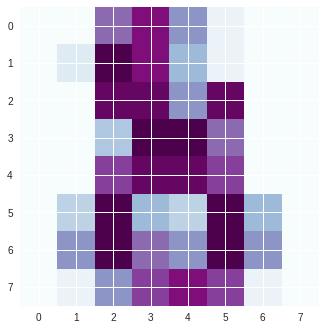

In [9]:
digits.images.shape

import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],cmap='BuPu')

In [0]:
data = digits.images.reshape((digits.images.shape[0], -1))

In [11]:
data.shape

(1797, 64)

In [0]:
#lets dive into the k nearest neighbour

# split the data into train and test data set. we would need a random seed to split the data randomly.

# KNeighborClassifer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris_X = iris.data
iris_y = iris.target

np.random.seed(2)

indices = np.random.permutation(len(iris_X))

# **K Nearest Neighbors**

In [0]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]


In [14]:
model = KNeighborsClassifier()
model.fit(iris_X_train, iris_y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', n_neighbors=5, p=2, weights = 'uniform')

model.predict(iris_X_test)

array([0, 2, 1, 0, 2, 1, 0, 0, 2, 0])

In [15]:
iris_y_test

array([0, 2, 1, 0, 2, 1, 0, 0, 1, 0])

# Diabetes Dataset Linear Regression

In [0]:
diabetes = datasets.load_diabetes()


In [17]:
diabetes.data.shape

(442, 10)

In [18]:
diabetes.feature_names
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [0]:
dia_X_train = diabetes.data[:-10]
dia_y_train = diabetes.target[:-10]

dia_X_test = diabetes.data[-10:]
dia_y_test = diabetes.target[-10:]

In [20]:
from sklearn.linear_model import LinearRegression

reg_mod = LinearRegression()

reg_mod.fit(dia_X_train, dia_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print(reg_mod.coef_)

[  -7.69208948 -249.13553938  520.78304932  322.69632935 -759.01946177
  464.23550399   69.98943143  149.72236267  736.85180204   77.1057682 ]


In [22]:
#mean squared error

np.mean((reg_mod.predict(dia_X_test) - dia_y_test)**2)

1304.1502807583972

In [23]:
#variance score. 1 is better prediction while 0 means that there is no linear relationship between x and y

reg_mod.score(dia_X_test, dia_y_test)

0.628934567204214

Ridge regularizer is about skrinking the regression coefficients to 0. Having a more closer representation of the underlying function.
It is also the example of the bias/variance tradeoff.

Ridge Regression has **alpha** parameter. **Higher alpha means higher bias and low variance**.


Capturing in the noise in the data that prevents the model from generalizing to new data is called **overfitting**. The bias introduced by the ridge regression is called **regularization**.

**LASSO** - least absolute shrinkage and selection operator. *it is helpful when we have a lot of features and we are looking to have features that are important and set the non important ones to 0.* LASSO helps in setting the coefficients to 0 for some of the features. Such methods are called **sparse** method.


LASSO solves the problem using coordinate descent method. this is efficient on large datasets. We also have the LassoLars method.

In [24]:

# Classification task

from sklearn import linear_model

log = linear_model.LogisticRegression()
log.fit(iris_X_train, iris_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**MultiClass classification**
  
  OneVsAll classifiers
  
  it is used for multiclass classification and then use a voting method for the final decision

# Sklearn Preprocessing

In [0]:
from __future__ import print_function

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [26]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
house_X, house_y = data.data, data.target

In [27]:
X = house_X[:,[0,5]]
X

array([[8.3252    , 2.55555556],
       [8.3014    , 2.10984183],
       [7.2574    , 2.80225989],
       ...,
       [1.7       , 2.3256351 ],
       [1.8672    , 2.12320917],
       [2.3886    , 2.61698113]])

In [0]:
distributions = [('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X))]

In [0]:
y = minmax_scale(house_y)

In [0]:
cmap = getattr(cm, 'plasma_r', cm.hot_r)

In [0]:
def create_axes(title, figsize = (15,5)):
  fig = plt.figure(figsize=figsize)
  fig.suptitle(title)
  
  left, width = 0.1, 0.22
  bottom, height = 0.1, 0.7
  bottom_h = height + 0.15
  left_h = left + width + 0.02
  
  rect_scatter = [left, bottom, width, height]
  rect_histx = [left, bottom_h, width, 0.1]
  rect_histy = [left_h, bottom, 0.05, height]

  ax_scatter = plt.axes(rect_scatter)
  ax_histx = plt.axes(rect_histx)
  ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
  left = width + left + 0.2
  left_h = left + width + 0.02

  rect_scatter = [left, bottom, width, height]
  rect_histx = [left, bottom_h, width, 0.1]
  rect_histy = [left_h, bottom, 0.05, height]

  ax_scatter_zoom = plt.axes(rect_scatter)
  ax_histx_zoom = plt.axes(rect_histx)
  ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
  left, width = width + left + 0.13, 0.01

  rect_colorbar = [left, bottom, width, height]
  ax_colorbar = plt.axes(rect_colorbar)

  return ((ax_scatter, ax_histy, ax_histx),
          (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
          ax_colorbar)


In [0]:
def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [0]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(house_y.min(), house_y.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

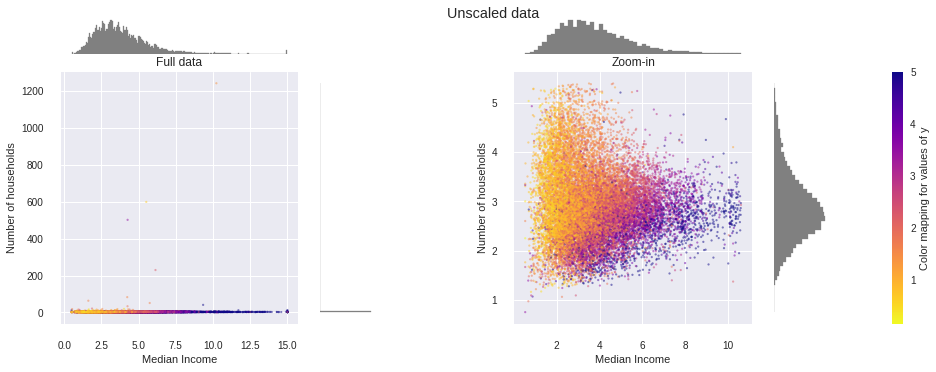

In [34]:
# data on the left is the original data and the data on the data without the marginal outliers. 

make_plot(0)

Standard Scaling

removes the mean of the data and scale it to the unit variance.
outliers hve impact on the calculation of the empirical mean and the standard deviation calculation.
StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity. bold text

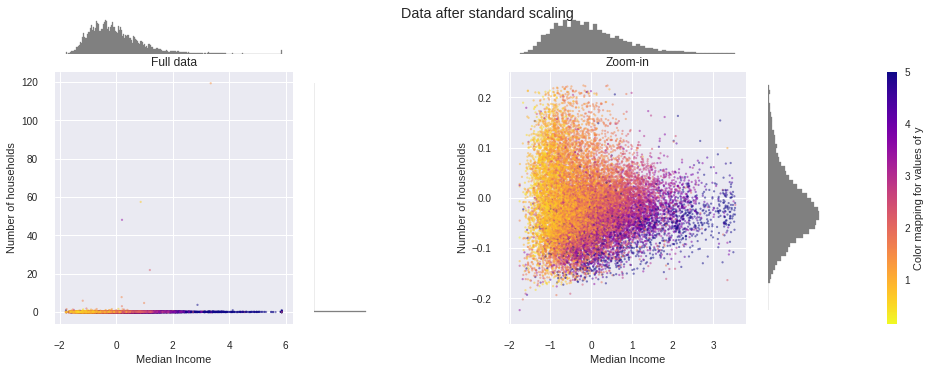

In [35]:


make_plot(1)

**Min Max Scaling:**

Rescales the data set such that all feature values are in the range [0,1]. It is very sensitive to the outliers.

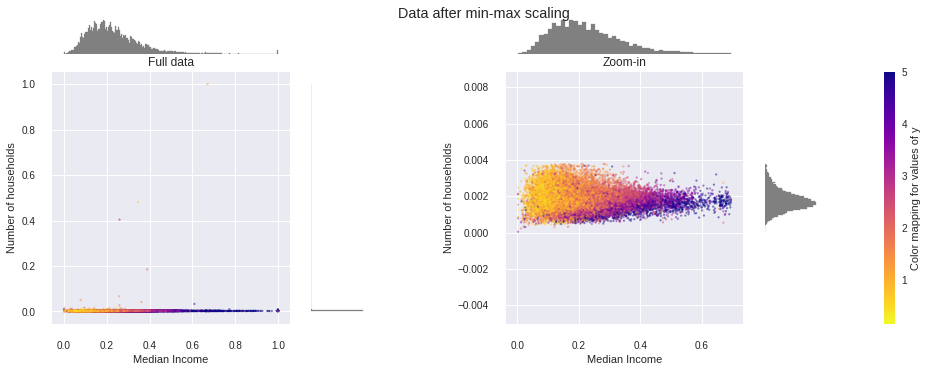

In [36]:
make_plot(2)

**MaxAbsScaler**

absolute values are mapped in the range [0,1]. on positive only data this is similar to the min max scaler.

*Good for data that is already centered around 0 or is a sparse data.


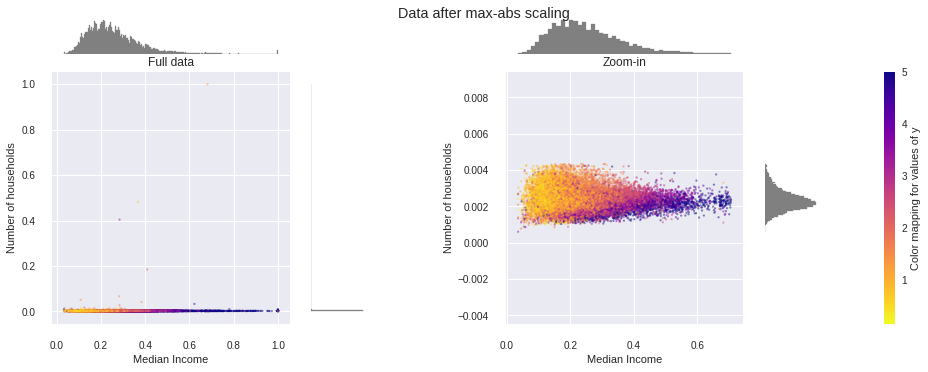

In [37]:
make_plot(3)

**Robust Scaler**

the centering and scaling statistics are based on percentiles. therefore, few number of large marginal outliers will not affect it much.


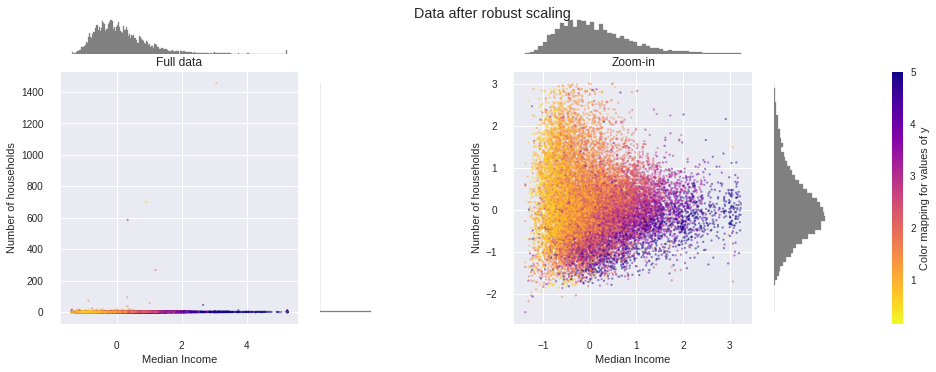

In [38]:
make_plot(4)

**Power Transformation**



*   applies power transformation to each feature and make the data more gaussian like.

*  Implements a box cox transformation and yeo johnsson.

* optimal scaling to optimize variance, minimize skewness through MLE.

* applies zero mean and unit variance.

*Box cox only on positive data while yeo johnson if negative values are present*


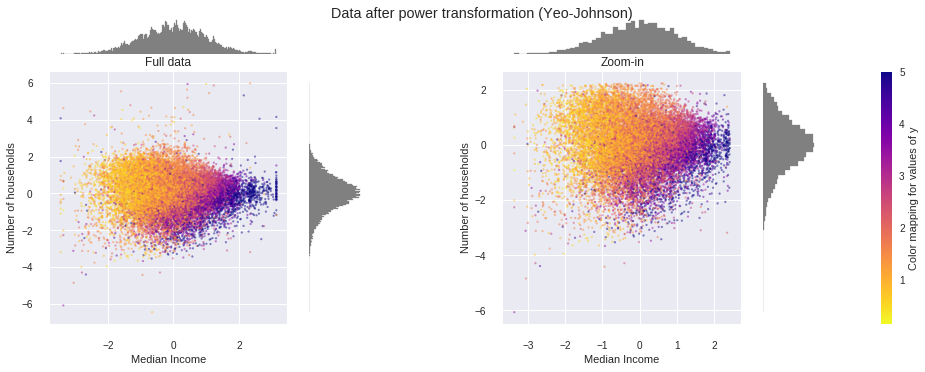

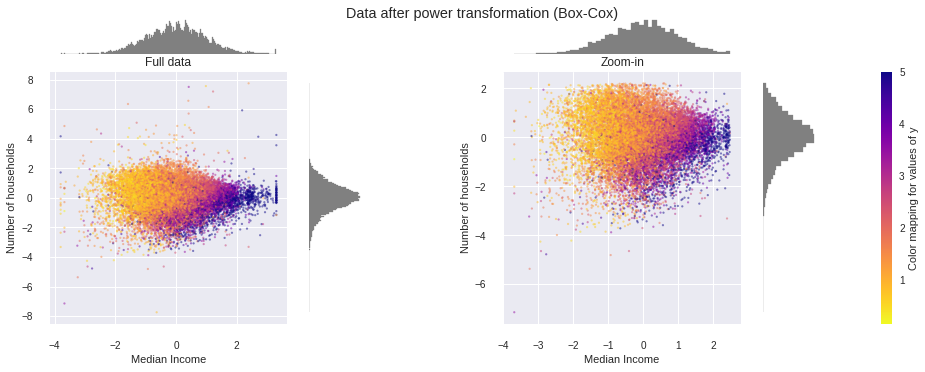

In [39]:
make_plot(5)
make_plot(6)

**Quantile Transformer**

has output distribution parameter to match gaussian distribution instead of uniform distribution.

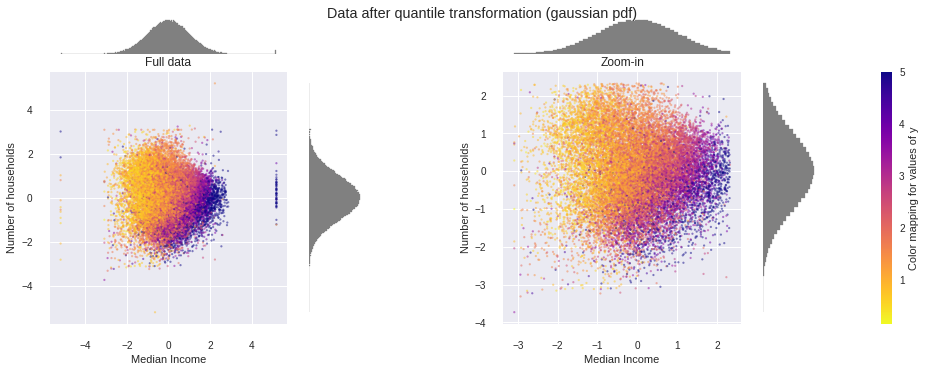

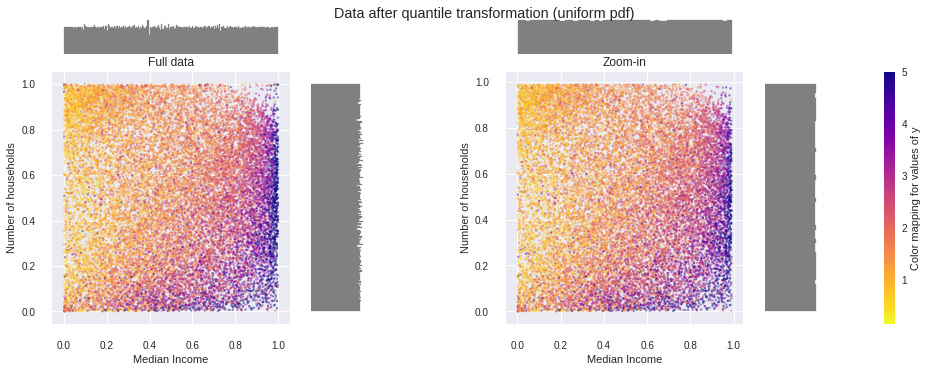

In [40]:
make_plot(7) # Gaussian output.

make_plot(8) # uniform output

**Normalizer**

Rescales the vector of each feature to have a unit norm. it is independent of the distribution of the data

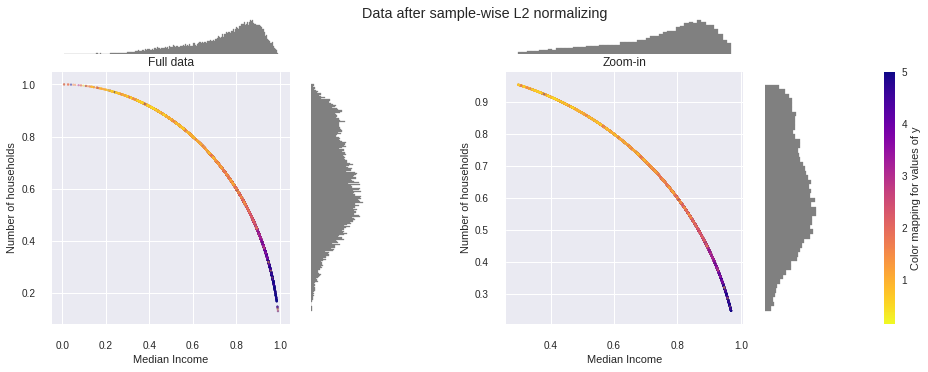

In [41]:
make_plot(9)

plt.show()

**Standardization **

We do it to have a more centered normal distribution kind of data spread. it assumes all features are centered around 0 and has a unit variance. if a feature has variance which has higher magnitude then it can affect then it can affect the objective function.


In [42]:
from sklearn import preprocessing

import numpy as np

x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

scaled_x = preprocessing.scale(x)
scaled_x

scaled_x.mean(axis=0)
scaled_x.std(axis=0)

array([1., 1., 1.])

In [43]:
# Use the standardscaler function to compute the mean and standard deviation on the training set and then apply the same transformation over the testing set.
scaler = preprocessing.StandardScaler().fit(x)
scaler.mean_
scaler.scale_
scaler.transform(x)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

**Dealing with sparse data**

Centering a sparse data will make it lose the sparseness properties of a sparse data. 

**MaxAbs Scaler** is especially used for scaling sparse data.

*Standard scaler* could accept the sparse input however *with_mean* needs to be *False*

Data with lot of outliers: It is not good to scale a data with many outliers to be scaled by mean and variance. We must use robust_scale and **robust scaler** for this case.

Normalization is process of scaling data samples to have unit form. This is useful when we are looking to have a similarity metric.

In [44]:
rand_array = np.random.randint(5,size=(3,3))
rand_array_norm = preprocessing.normalize(rand_array, norm='l2')
rand_array_norm

array([[0.9486833 , 0.31622777, 0.        ],
       [0.21821789, 0.87287156, 0.43643578],
       [0.        , 0.70710678, 0.70710678]])

In [45]:
rand_array_norm_l1 = preprocessing.normalize(rand_array, norm='l1')
rand_array_norm_l1

array([[0.75      , 0.25      , 0.        ],
       [0.14285714, 0.57142857, 0.28571429],
       [0.        , 0.5       , 0.5       ]])

In [46]:
cat1 = [['advisa', 'bw', 'data analyst'] , ['securitas', 'airmee', 'ds']]
encod = preprocessing.OrdinalEncoder()
encod.fit(cat1)
encod.transform([['advisa', 'bw', 'data analyst']])

array([[0., 1., 0.]])

In [47]:
# ordinalencoder. can not be used with scikit learn as the it would intrepret the categories to be in order which is not the case.

enc =  preprocessing.OrdinalEncoder()

X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)  

enc.transform([['female', 'from US', 'uses Safari']])


array([[0., 1., 1.]])

In [48]:
ohe_enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
ohe_enc.fit(X)
ohe_enc.transform([['male', 'from US', 'uses Safari']]).toarray()



array([[0., 1., 0., 1., 0., 1.]])

In [49]:
ohe_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [50]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [51]:
X = np.arange(6).reshape(3,2)
poly = preprocessing.PolynomialFeatures(3, interaction_only=True)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

Automatically created module for IPython interactive environment


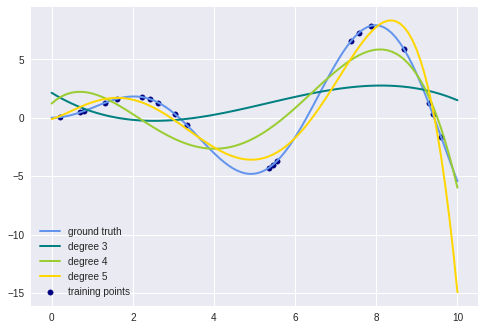

In [52]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

# Missing values preprocessing 



1.   what are the methods of imputation of missnig values?
 
2.   List item



In [53]:
#Simple Imputation

# Subsitute the values using a constant value or with a statistic based values like mean median or mode.

from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute.fit([[3,4],[np.nan,2], [8,5]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]

print(impute.transform(X))

[[5.5        2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [54]:
impute.statistics_

array([5.5       , 3.66666667])

for pandas, if the categorical datas are string then we can impute values using the **most frequent or constant method.**

# Cross validation for parameters and the estimators

In [55]:
# Kfold cross validation

from sklearn import datasets, svm

svc = svm.SVC(C=1, kernel='linear')
digits = datasets.load_digits()

X_digits = np.array_split(digits.data, 3)
y_digits = np.array_split(digits.target, 3)

scores = list()

for k in range(3):
  trainx = list(X_digits)
  testx = trainx.pop(k)
  trainx = np.concatenate(trainx)
  
  trainy = list(y_digits)
  testy = trainy.pop(k)
  trainy = np.concatenate(trainy)
  
  scores.append(svc.fit(trainx, trainy).score(testx,testy))
  
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [56]:
# cross validation generators

from sklearn.model_selection import KFold, cross_val_score

X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
scores = list()

k_fold = KFold(n_splits = 5)

for train_ind, test_ind in k_fold.split(X):
  print('Train set : {} Test Indices : {}'.format(train_ind, test_ind))
  
  
#   scores.append(svc.fit(X_digits[train_ind], y_digits[train_ind]).score(X_digits[test_ind], y_digits[test_ind]))

Train set : [2 3 4 5 6 7 8 9] Test Indices : [0 1]
Train set : [0 1 4 5 6 7 8 9] Test Indices : [2 3]
Train set : [0 1 2 3 6 7 8 9] Test Indices : [4 5]
Train set : [0 1 2 3 4 5 8 9] Test Indices : [6 7]
Train set : [0 1 2 3 4 5 6 7] Test Indices : [8 9]


In [57]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1)
clf.fit(digits.data[:1000],digits.target[:1000])   

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
clf.best_estimator_.C


0.007742636826811277

In [60]:
# cross validated estimators

from sklearn import linear_model, datasets

lasso = linear_model.LassoCV(cv=3)

diabetes = datasets.load_diabetes()

diab_x = diabetes.data
diab_y = diabetes.target

lasso.fit(diab_x, diab_y)

LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [61]:
lasso.alpha_

0.012291895087486161

In [68]:
#finding the opimal regularization parameter

from __future__ import print_function

print(__doc__)

from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()

X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4,-0.5, 30)

n_folds = 5
tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(estimator = lasso, param_grid = tuned_parameters, cv=n_folds, refit = False)

clf.fit(X,y)

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([1.00000e-04, 1.32035e-04, 1.74333e-04, 2.30181e-04, 3.03920e-04,
       4.01281e-04, 5.29832e-04, 6.99564e-04, 9.23671e-04, 1.21957e-03,
       1.61026e-03, 2.12611e-03, 2.80722e-03, 3.70651e-03, 4.89390e-03,
       6.46167e-03, 8.53168e-03, 1.12648e-02, 1.48735e-02, 1.96383e-02,
       2.59294e-02, 3.42360e-02, 4.52035e-02, 5.96846e-02, 7.88046e-02,
       1.04050e-01, 1.37382e-01, 1.81393e-01, 2.39503e-01, 3.16228e-01])}],
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

(0.0001, 0.31622776601683794)

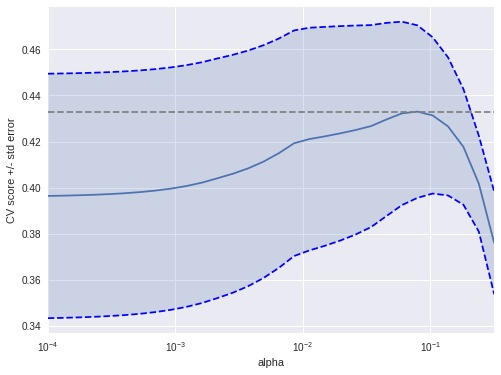

In [78]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(8,6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')


plt.fill_between(alphas, scores+std_error, scores-std_error, alpha = 0.2 )

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [81]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
k_fold = KFold(3)
print(k_fold)

KFold(n_splits=3, random_state=None, shuffle=False)


In [82]:
for k, (train, test) in enumerate(k_fold.split(X, y)):
  lasso_cv.fit(X[train], y[train])
  print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))

[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193


# Unsupervised Learning